In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
import io
color_pal = sns.color_palette()
from tqdm.notebook import tqdm
tqdm.pandas()
from matplotlib.dates import WeekdayLocator, MonthLocator, DateFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('/Users/giorgiotacchella/Desktop/job/on_assignment/data_science_internship_assignment_input_data.csv')

# Exploratory Data Analysis

We have data for 9948 customers

In [4]:
data.shape

(9948, 12)

In [5]:
len(data.uid.unique())

9948

In [6]:
data.head(10)

,uid,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased
0,5,0,1,0,0,0,0,282,0,United States,46,1
1,16,0,1,0,0,0,0,270,0,United States,29,1
2,37,0,0,1,1,0,0,581,0,Australia,97,1
3,55,0,1,0,0,0,0,107,0,Japan,218,0
4,80,0,0,0,0,0,0,97,0,United States,219,0
5,92,0,1,0,0,0,0,150,0,United States,1577,0
6,93,0,1,0,0,0,0,148,0,United States,476,0
7,100,1,0,0,1,0,0,329,2,Germany,216,1
8,102,0,0,0,0,0,0,109,0,Australia,415,0
9,115,0,0,0,0,0,0,132,0,United States,458,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9948 entries, 0 to 9947
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   uid                               9948 non-null   int64 
 1   number_of_customer_support_cases  9948 non-null   int64 
 2   is_newsletter_subscriber          9948 non-null   int64 
 3   apparel_purchased                 9948 non-null   int64 
 4   accessories_purchased             9948 non-null   int64 
 5   ecom_limited_edition_purchased    9948 non-null   int64 
 6   is_subscribed_to_cyclon           9948 non-null   int64 
 7   total_revenue                     9948 non-null   int64 
 8   quantity_rma                      9948 non-null   int64 
 9   country                           9936 non-null   object
 10  days_since_last_purchase          9948 non-null   int64 
 11  repurchased                       9948 non-null   int64 
dtypes: int64(11), object

There are only 12 missing values in the country column

In [8]:
data.isna().sum(axis=0)

uid                                  0
number_of_customer_support_cases     0
is_newsletter_subscriber             0
apparel_purchased                    0
accessories_purchased                0
ecom_limited_edition_purchased       0
is_subscribed_to_cyclon              0
total_revenue                        0
quantity_rma                         0
country                             12
days_since_last_purchase             0
repurchased                          0
dtype: int64

In [9]:
data.describe()

,uid,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,days_since_last_purchase,repurchased
count,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000
mean,50232.066546,0.734318,0.452151,0.073382,0.068758,0.031263,0.000201,907.346703,0.651287,468.587153,0.493265
std,28693.549638,1.866587,0.497730,0.260775,0.253054,0.174035,0.014178,4962.484458,1.868054,471.504391,0.499980
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,25777.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000,0.000000,122.000000,0.000000
50%,50243.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,251.000000,0.000000,324.000000,0.000000
75%,74988.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,519.000000,1.000000,664.000000,1.000000
max,99995.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,327444.000000,44.000000,4073.000000,1.000000


### Country

The majority of costumers comes from the US, followed by Germany and the UK

[Text(0, 0, 'United States'),
 Text(1, 0, 'Germany'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'Switzerland'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'Austria'),
 Text(6, 0, 'Japan'),
 Text(7, 0, 'Brazil'),
 Text(8, 0, 'France'),
 Text(9, 0, 'Australia')]

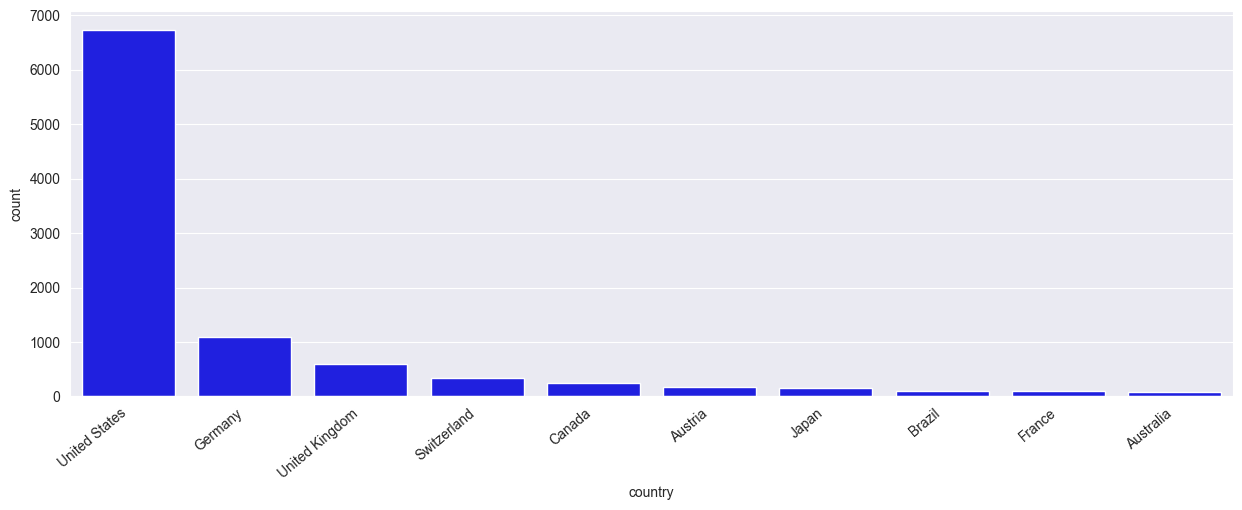

In [10]:
country_count = data['country'].value_counts()
top_10_countries = country_count.head(10).reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(data=top_10_countries, x = 'country', y='count', color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [11]:
data['country'].value_counts(normalize=True)*100

country
United States        67.783816
Germany              11.080918
United Kingdom        6.068841
Switzerland           3.331320
Canada                2.516103
Austria               1.700886
Japan                 1.529791
Brazil                1.086957
France                0.925926
Australia             0.905797
Spain                 0.563607
BeNe                  0.543478
Italy                 0.462963
Distributors EU       0.311997
Distributors APAC     0.301932
China                 0.221417
Hong Kong             0.161031
Norway                0.130837
Sweden                0.110709
Other Ecom EU         0.090580
Denmark               0.090580
Distributors ROW      0.040258
Other Ecom APAC       0.020129
Other Ecom ROW        0.020129
Name: proportion, dtype: float64

### Contacted support

Most customers have not contacted support, but there is a small number of customers that has a high number of cases

In [12]:
data['number_of_customer_support_cases'].describe()

count    9948.000000
mean        0.734318
std         1.866587
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        52.000000
Name: number_of_customer_support_cases, dtype: float64

In [13]:
data['number_of_customer_support_cases'].value_counts()

number_of_customer_support_cases
0     6886
1     1550
2      638
3      338
4      204
5      112
6       66
7       38
9       27
8       24
11      11
10      11
12       8
13       8
14       6
20       5
16       4
15       3
17       3
31       2
32       1
52       1
37       1
34       1
Name: count, dtype: int64

Creating categorical feature contacted_support where 1-yes and 0-no.

In [14]:
data['contacted_support'] = data['number_of_customer_support_cases'].apply(lambda x: 1 if x > 0 else 0)
print('Contacted support at least once:', len(data[data['number_of_customer_support_cases'] != 0]))

Contacted support at least once: 3062


Almost 70% of customers have not contacted support.

Text(0, 0.5, '')

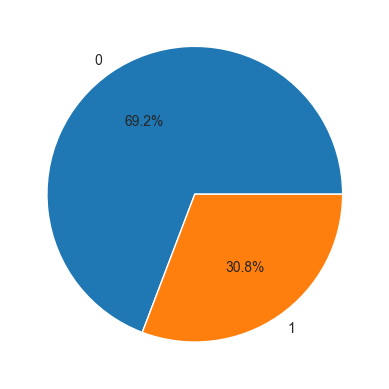

In [15]:
contacted_support = data['contacted_support'].value_counts()
contacted_support.plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False)
plt.ylabel('')

Of the customers that have contacted support, vast majority of them have between 1 and 10 cases

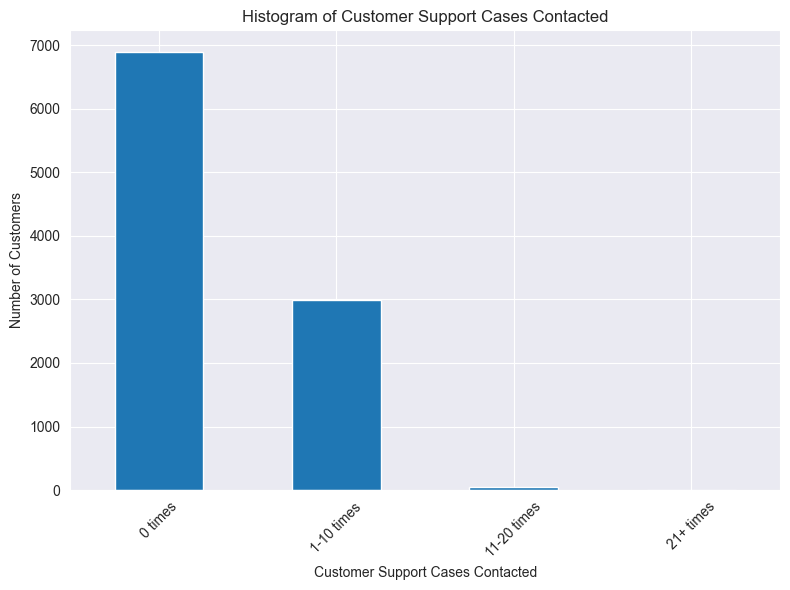

In [16]:
bins = [0, 1, 10, 20, 52]
labels = ['0 times', '1-10 times', '11-20 times', '21+ times']
data['support_bins'] = pd.cut(data['number_of_customer_support_cases'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8, 6))
data['support_bins'].value_counts(sort=False).plot(kind='bar')
plt.title('Histogram of Customer Support Cases Contacted')
plt.xlabel('Customer Support Cases Contacted')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
have_contacted_support = data[data['contacted_support'] == 1]
have_contacted_support['number_of_customer_support_cases'].value_counts(normalize = True)*100

number_of_customer_support_cases
1     50.620509
2     20.836055
3     11.038537
4      6.662312
5      3.657740
6      2.155454
7      1.241019
9      0.881777
8      0.783801
11     0.359242
10     0.359242
12     0.261267
13     0.261267
14     0.195950
20     0.163292
16     0.130634
15     0.097975
17     0.097975
31     0.065317
32     0.032658
52     0.032658
37     0.032658
34     0.032658
Name: proportion, dtype: float64

In which countries have customers contacted support the most?

In [18]:
pct_support = data.groupby('country')['contacted_support'].mean() * 100
pct_support.sort_values(ascending=False)

country
Other Ecom ROW       100.000000
Distributors EU       48.387097
Spain                 46.428571
Denmark               44.444444
Hong Kong             43.750000
Switzerland           39.274924
Australia             38.888889
Norway                38.461538
Germany               38.328792
Brazil                36.111111
Canada                34.800000
Austria               33.727811
France                33.695652
Other Ecom EU         33.333333
United Kingdom        32.504146
Japan                 31.578947
Distributors APAC     30.000000
BeNe                  29.629630
United States         28.448404
Italy                 26.086957
Sweden                18.181818
Other Ecom APAC        0.000000
China                  0.000000
Distributors ROW       0.000000
Name: contacted_support, dtype: float64

### Newsletter subscription

Almost one in two customers is subscribed to the newsletter

Text(0, 0.5, '')

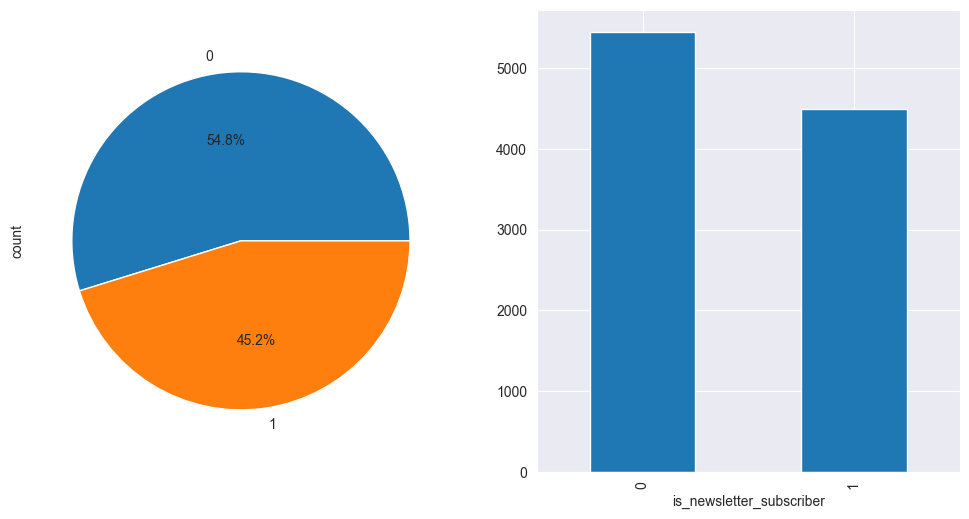

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
newsletter_counts = data['is_newsletter_subscriber'].value_counts()
newsletter_counts.plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False,ax=ax1)
newsletter_counts.plot(kind = 'bar', y = 'count', legend=False, ax=ax2)
plt.ylabel('')

Checking percentage of customers subscribed to the newsletter by country

In [20]:
pct_sub_newsletter = data.groupby('country')['is_newsletter_subscriber'].mean() * 100
pct_sub_newsletter.sort_values(ascending=False)


country
Distributors APAC    63.333333
Brazil               59.259259
Japan                55.263158
United States        53.407572
Other Ecom ROW       50.000000
Other Ecom APAC      50.000000
Canada               47.200000
Other Ecom EU        44.444444
Australia            40.000000
Switzerland          37.764350
Hong Kong            37.500000
Spain                35.714286
Distributors EU      32.258065
Norway               30.769231
Italy                30.434783
France               29.347826
BeNe                 25.925926
Distributors ROW     25.000000
United Kingdom       22.553897
Austria              18.343195
Sweden               18.181818
Germany              16.712080
Denmark               0.000000
China                 0.000000
Name: is_newsletter_subscriber, dtype: float64

### Apparel, Accessories and limited edition

Only 7.3% of customers purchased apparel.

Text(0, 0.5, '')

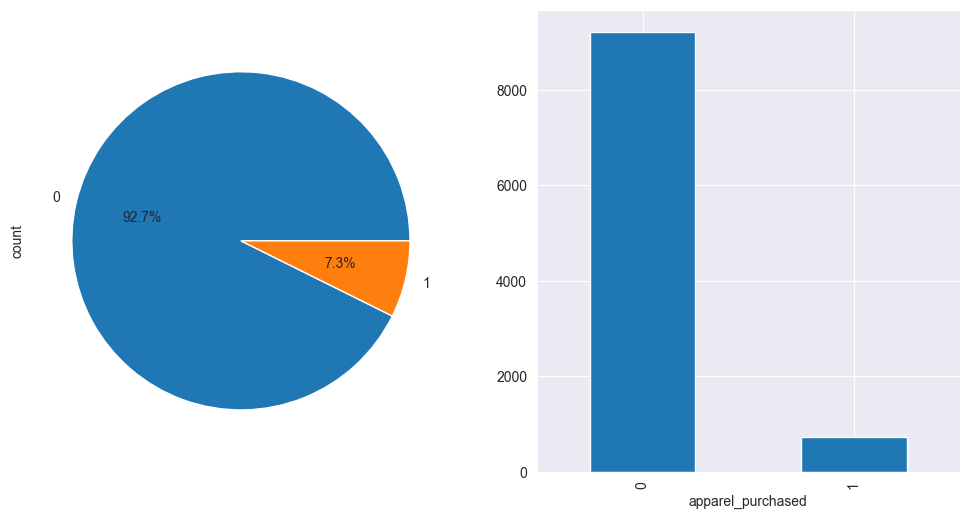

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
apparel_purchased_counts = data['apparel_purchased'].value_counts()
apparel_purchased_counts.plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False,ax=ax1)
apparel_purchased_counts.plot(kind = 'bar', y = 'count', legend=False, ax=ax2)
plt.ylabel('')

Percentage of customers who have purchased apparel by country

In [22]:
pct_apparel = data.groupby('country')['apparel_purchased'].mean() * 100
pct_apparel.sort_values(ascending=False)

country
Norway               61.538462
Other Ecom ROW       50.000000
Hong Kong            37.500000
Distributors EU      25.806452
France               23.913043
Denmark              22.222222
Brazil               19.444444
Sweden               18.181818
United Kingdom       17.578773
Japan                16.447368
Switzerland          16.314199
BeNe                 14.814815
Australia            14.444444
Spain                12.500000
Other Ecom EU        11.111111
Italy                10.869565
Austria              10.650888
Germany              10.445050
Canada                9.600000
China                 4.545455
United States         4.187082
Other Ecom APAC       0.000000
Distributors ROW      0.000000
Distributors APAC     0.000000
Name: apparel_purchased, dtype: float64

Similarly, 6.9% of customers purchase accessories

Text(0, 0.5, '')

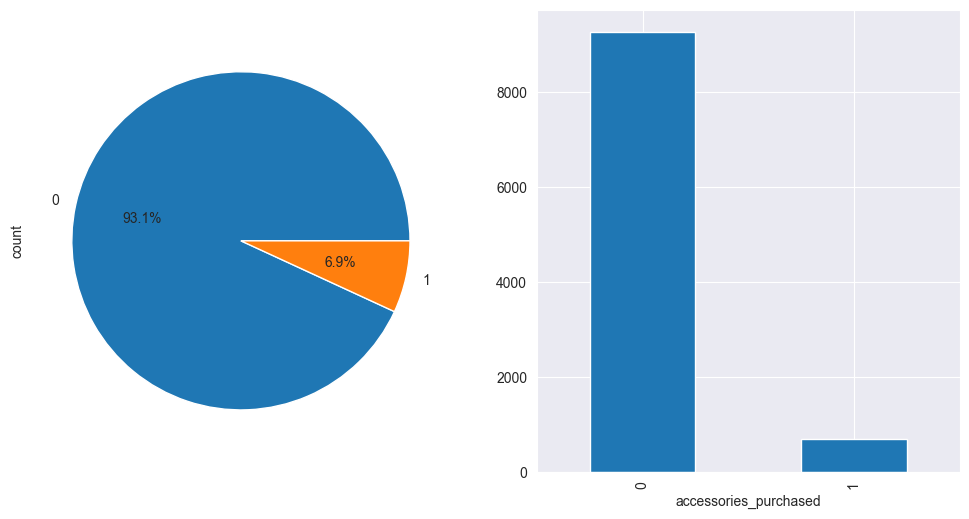

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
accessories_purchased_counts = data['accessories_purchased'].value_counts()
accessories_purchased_counts .plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False,ax=ax1)
accessories_purchased_counts .plot(kind = 'bar', y = 'count', legend=False, ax=ax2)
plt.ylabel('')

Percentage of customers who have purchased accessories by country

In [24]:
pct_accessories= data.groupby('country')['accessories_purchased'].mean() * 100
pct_accessories.sort_values(ascending=False)

country
Other Ecom EU        33.333333
Norway               30.769231
Distributors EU      25.806452
Japan                21.710526
BeNe                 20.370370
Australia            17.777778
France               15.217391
Switzerland          15.105740
Canada               14.800000
Spain                14.285714
United Kingdom       12.769486
Hong Kong            12.500000
Italy                10.869565
Austria               9.467456
China                 9.090909
Brazil                8.333333
Germany               8.174387
Distributors APAC     6.666667
United States         4.394952
Distributors ROW      0.000000
Other Ecom APAC       0.000000
Other Ecom ROW        0.000000
Denmark               0.000000
Sweden                0.000000
Name: accessories_purchased, dtype: float64

Only 3.1% of customers purchase limited edition items

Text(0, 0.5, '')

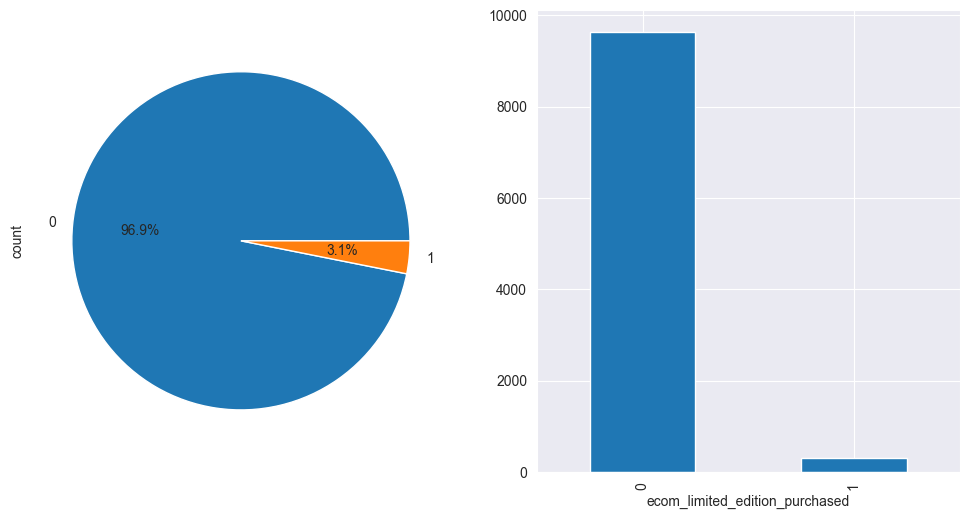

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
limited_edition_purchased_counts = data['ecom_limited_edition_purchased'].value_counts()
limited_edition_purchased_counts .plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False,ax=ax1)
limited_edition_purchased_counts .plot(kind = 'bar', y = 'count', legend=False, ax=ax2)
plt.ylabel('')

### Cyclon subs

Only two customers are subscribed to cyclon

In [26]:
data['is_subscribed_to_cyclon'].value_counts()

is_subscribed_to_cyclon
0    9946
1       2
Name: count, dtype: int64

### Revenue

Total revenue has a wide range of values: from 1€ minimum to 327444€ maximum.

There is big variability in spending.

There are probably some outliers? People spending more than 5000€? Or a lot of bulk orders by organizations? 

As seen in the histogram below, most customers have spent less 5000€.

In [27]:
data['total_revenue'].describe()

count      9948.000000
mean        907.346703
std        4962.484458
min           1.000000
25%         140.000000
50%         251.000000
75%         519.000000
max      327444.000000
Name: total_revenue, dtype: float64

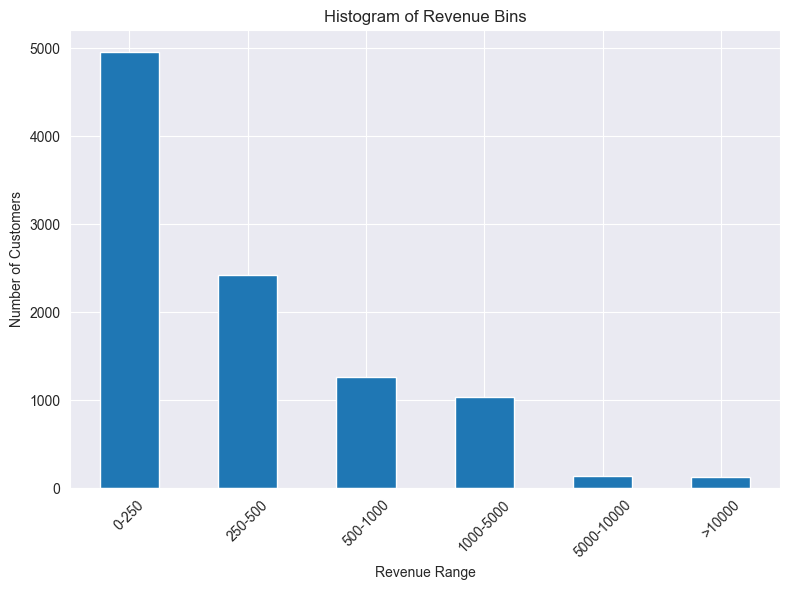

In [28]:
bins = [0, 250, 500, 1000, 5000, 10000, float('inf')] 
labels = ['0-250', '250-500', '500-1000', '1000-5000', '5000-10000', '>10000']
data['revenue_bins'] = pd.cut(data['total_revenue'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8, 6))
data['revenue_bins'].value_counts(sort=False).plot(kind='bar')
plt.title('Histogram of Revenue Bins')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
data['revenue_bins'].value_counts()

revenue_bins
0-250         4953
250-500       2423
500-1000      1269
1000-5000     1035
5000-10000     140
>10000         128
Name: count, dtype: int64

Most revenue comes from the United states who also has the most customers in this dataset.

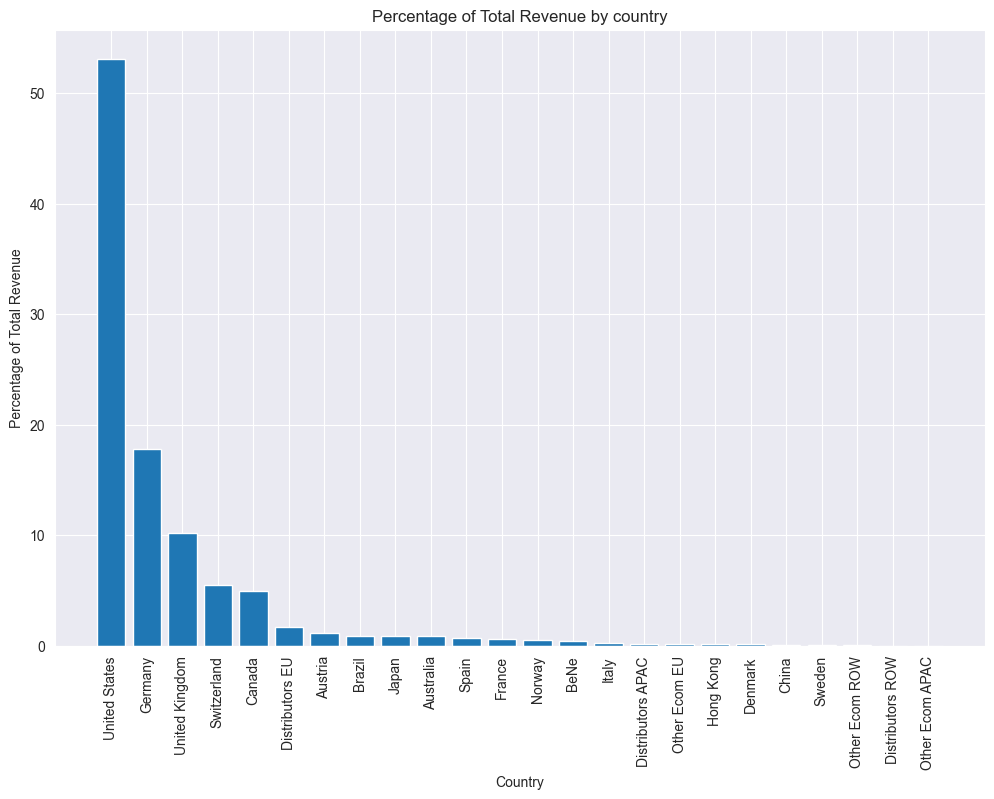

In [30]:
revenue_by_country = data.groupby('country')['total_revenue'].sum()
revenue_by_country = revenue_by_country.sort_values(ascending=False)
total_amount = revenue_by_country.sum()
percentage_by_country = (revenue_by_country / total_amount) * 100
plt.figure(figsize=(12, 8))
plt.bar(percentage_by_country.index, percentage_by_country.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Percentage of Total Revenue')
plt.title('Percentage of Total Revenue by country')
plt.show()

United states has most of this outlier spenders

In [31]:
df = data[data['total_revenue']>=5000]
df['country'].value_counts(dropna= False)

country
United States        140
Germany               52
United Kingdom        22
Switzerland           18
Canada                11
Spain                  4
Australia              4
Distributors EU        4
Austria                3
Brazil                 2
Norway                 2
Other Ecom EU          2
Distributors APAC      1
BeNe                   1
Denmark                1
Japan                  1
Name: count, dtype: int64

In [32]:
len(df)

268

Of this big spenders have they all made repurchases?

In [78]:
df['repurchased'].value_counts()

repurchased
1    268
Name: count, dtype: int64

### Returns

Around 70% of customers have never returned an item

I create a categorical variable has_returned where 1-yes and 0-no to see if customers have ever made a return.

Has done at least one return: 2904


Text(0, 0.5, '')

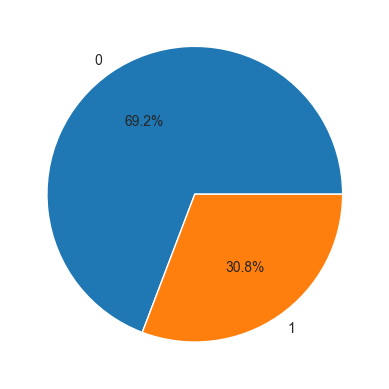

In [33]:
data['has_returned'] = data['quantity_rma'].apply(lambda x: 1 if x > 0 else 0)
print('Has done at least one return:', len(data[data['has_returned'] != 0]))
has_returned = data['has_returned'].value_counts()
contacted_support.plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False)
plt.ylabel('')

In [34]:
pct_returns= data.groupby('country')['has_returned'].mean() * 100
pct_returns.sort_values(ascending=False)

country
Germany              54.859219
Other Ecom EU        44.444444
BeNe                 40.740741
Austria              40.236686
Switzerland          39.274924
Distributors EU      38.709677
Sweden               36.363636
United Kingdom       32.835821
Spain                32.142857
Canada               25.200000
Hong Kong            25.000000
United States        24.662212
Australia            24.444444
Norway               23.076923
Denmark              22.222222
France               21.739130
Italy                21.739130
Brazil               21.296296
Japan                17.763158
China                13.636364
Distributors APAC    13.333333
Other Ecom APAC       0.000000
Distributors ROW      0.000000
Other Ecom ROW        0.000000
Name: has_returned, dtype: float64

In [35]:
data['quantity_rma'].describe()

count    9948.000000
mean        0.651287
std         1.868054
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        44.000000
Name: quantity_rma, dtype: float64

~60% of customers have returned only one 1 item.

In [36]:
have_returned = data[data['has_returned'] == 1]
have_returned['quantity_rma'].value_counts(normalize=True).head(10) * 100

quantity_rma
1     58.953168
2     18.904959
3      8.264463
4      4.407713
5      2.720386
6      1.687328
8      1.170799
7      0.929752
9      0.482094
11     0.413223
Name: proportion, dtype: float64

Most customers have returned between 1 and 5 items

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='quantity_rma', ylabel='Count'>

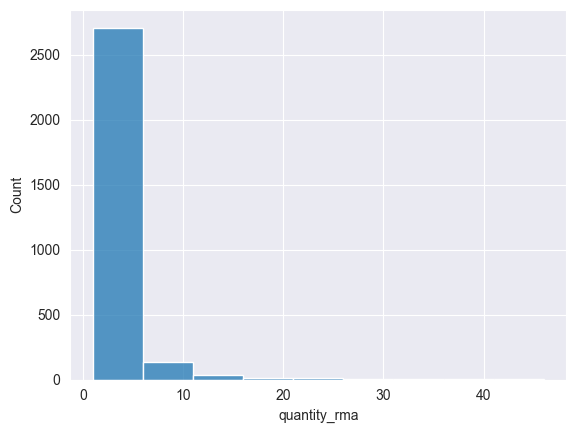

In [37]:
sns.histplot(data=have_returned, x= 'quantity_rma', binwidth=5)

### Days since last purchase

In [38]:
data['days_since_last_purchase'].describe()

count    9948.000000
mean      468.587153
std       471.504391
min         0.000000
25%       122.000000
50%       324.000000
75%       664.000000
max      4073.000000
Name: days_since_last_purchase, dtype: float64

Most customers made their last purchase in the last year.

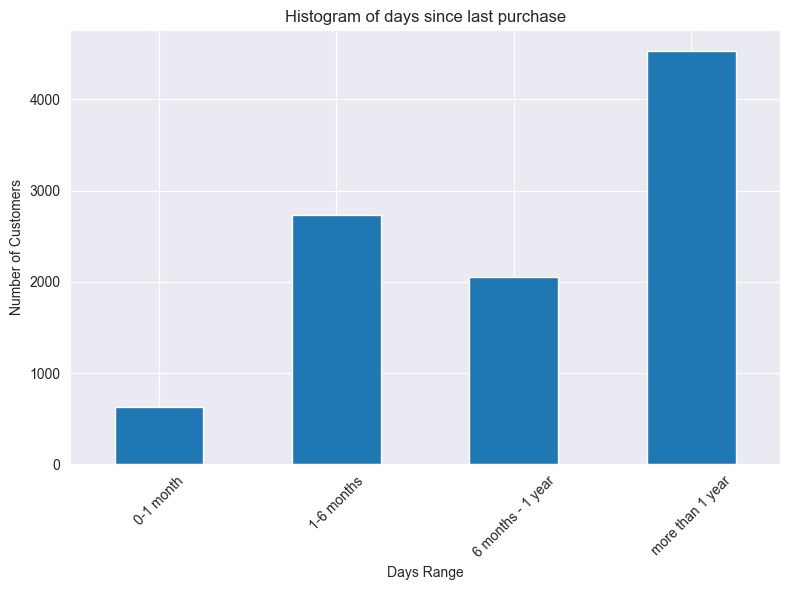

In [39]:
bins = [0, 30, 180, 365, float('inf')] 
labels = ['0-1 month', '1-6 months', '6 months - 1 year', 'more than 1 year']
data['day_bins'] = pd.cut(data['days_since_last_purchase'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(8, 6))
data['day_bins'].value_counts(sort=False).plot(kind='bar')
plt.title('Histogram of days since last purchase')
plt.xlabel('Days Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at 6 months bins in this histogram.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='days_since_last_purchase', ylabel='Count'>

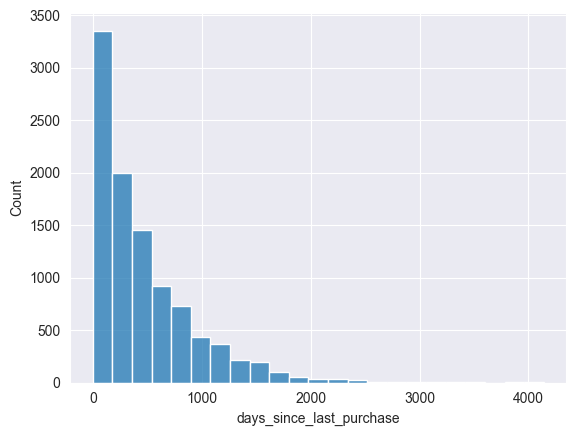

In [40]:
sns.histplot(data=data, x= 'days_since_last_purchase', binwidth=180)

### Repurchase

Almost equal amount of customers have made repurchases.

Text(0, 0.5, '')

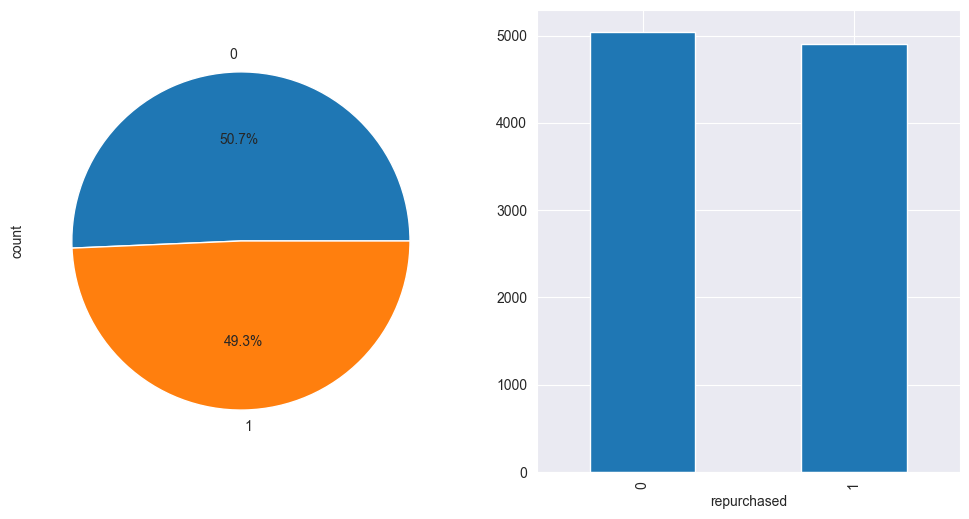

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
repurchased_counts = data['repurchased'].value_counts()
repurchased_counts.plot(kind = 'pie', y = 'count', autopct='%1.1f%%', legend=False,ax=ax1)
repurchased_counts.plot(kind = 'bar', y = 'count', legend=False, ax=ax2)
plt.ylabel('')

Repurchases go down as more time passes since last purchase.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='days_since_last_purchase', ylabel='Count'>

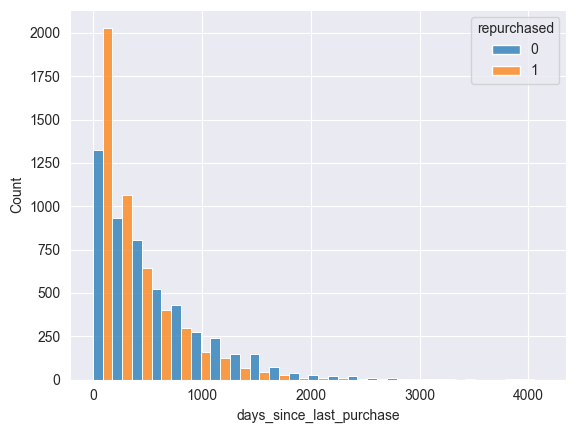

In [42]:
sns.histplot(data=data, x= 'days_since_last_purchase', binwidth=180, hue='repurchased', multiple="dodge")

The proportion of customers who made a repurchase is higher among newsletter subscribers

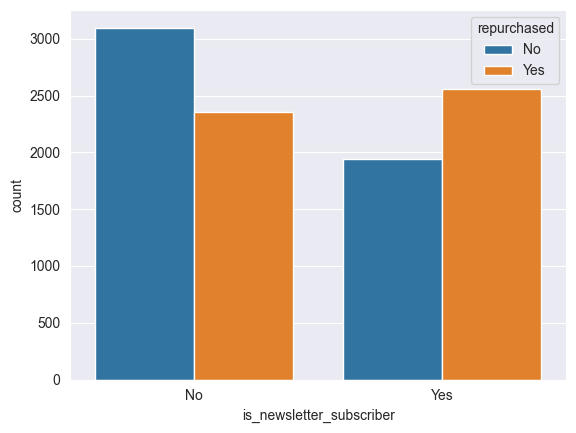

In [43]:
sns.countplot(data=data, x = 'is_newsletter_subscriber', hue='repurchased')
plt.xticks([0, 1], ['No', 'Yes'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles, new_labels, title="repurchased")

The proportion of customers who made a repurchase is higher among customers that have also bought apparel items.

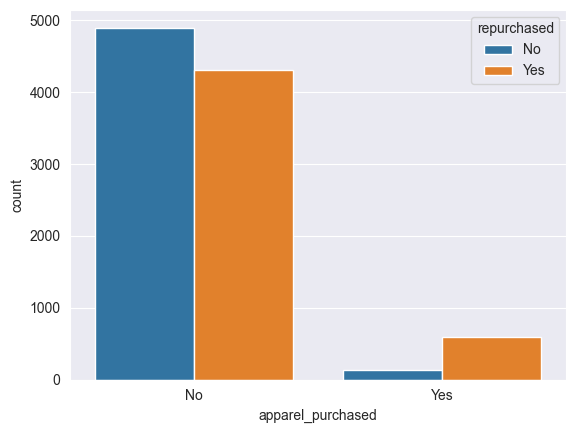

In [44]:
sns.countplot(data=data, x = 'apparel_purchased', hue='repurchased')
plt.xticks([0, 1], ['No', 'Yes'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles, new_labels, title="repurchased")

The proportion of customers who made a repurchase is higher among customers that have also bought accessories.

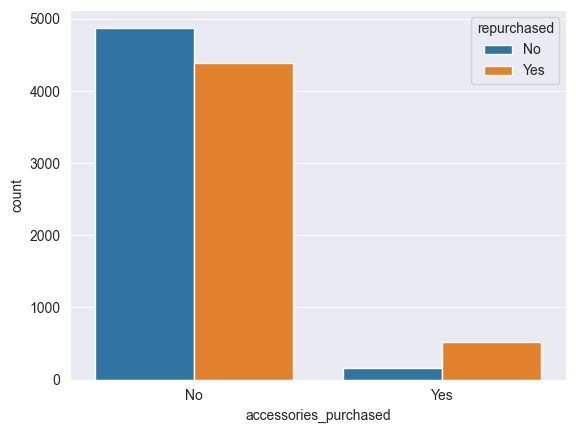

In [45]:
sns.countplot(data=data, x = 'accessories_purchased', hue='repurchased')
plt.xticks([0, 1], ['No', 'Yes'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles, new_labels, title="repurchased")

The proportion of customers who made a repurchase is higher among customers that have also bought limited edition items.

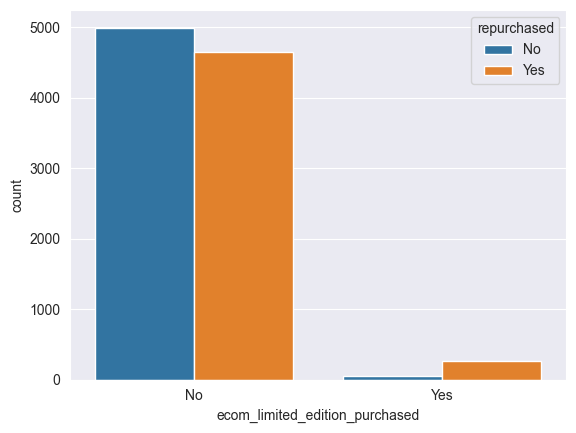

In [46]:
sns.countplot(data=data, x = 'ecom_limited_edition_purchased', hue='repurchased')
plt.xticks([0, 1], ['No', 'Yes'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles, new_labels, title="repurchased")

The proportion of customers who made a repurchase is higher among customers that have also returned an item.

Is a purchase considered a repurchase when a customers returns an item and buys the same item with a different size for example?

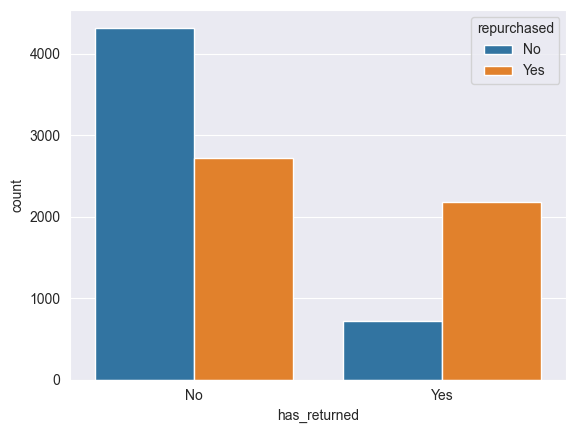

In [47]:
sns.countplot(data=data, x = 'has_returned', hue='repurchased')
plt.xticks([0, 1], ['No', 'Yes'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles, new_labels, title="repurchased")

## ML model

Looking at correlation matrix to see which features have the most impact on the the repurchased target variable

There is moderated positive correlation between most features and the target variable.

Two categorical features I have created: contacted_support, has_returned have pretty high positive correlation.

The days_since_last_purchase has negative correlation, meaning that the higher the number of days since the last purchase the less likely a customer is to purchase again.

(12.5, -0.5)

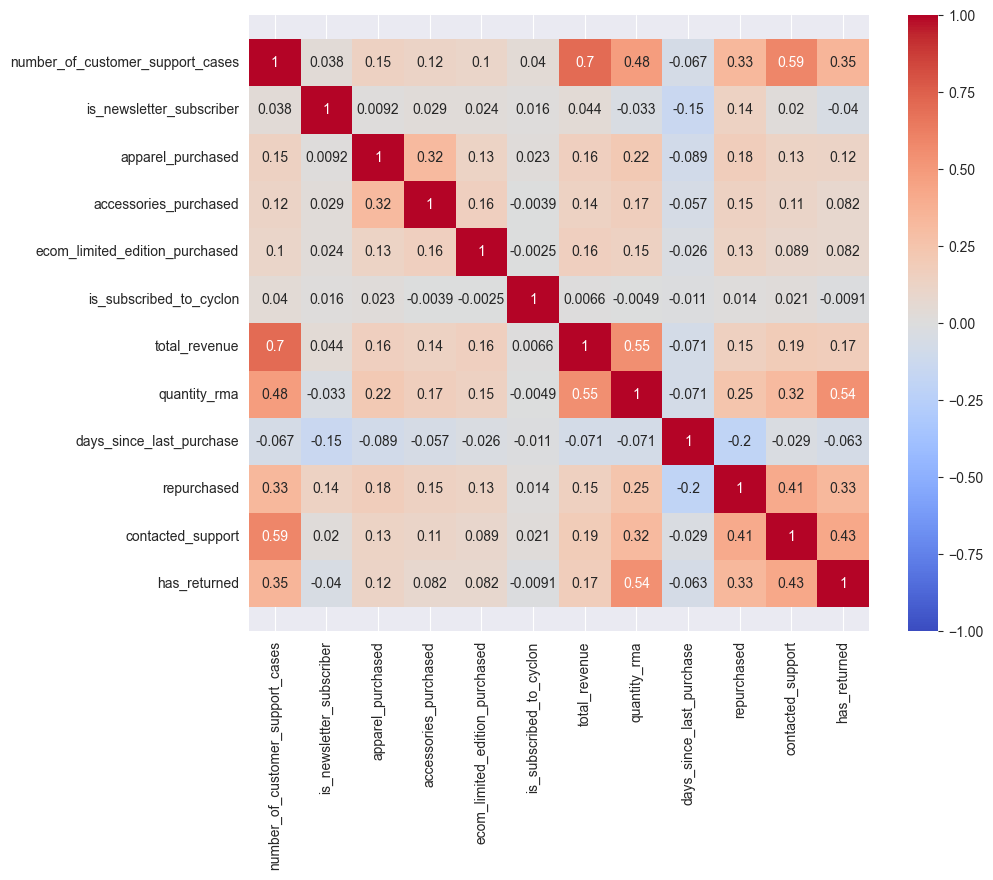

In [48]:
data1 = data.copy()
data1.drop(columns=['uid'], inplace = True)
correlation_matrix = data1.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

As seen above the target class are quite balanced

I decide to use this features for the model. 

As a baseline I use a simple logistic regression.

Since there are big outliers in the total_revenue column, I could winsorize the data if the model does not perform well with this outliers or also do some scaling.

I don't use the is_subscribed_to_cyclon column since only 2 customers are subscribed to it and the correlation is very small.

In [69]:
features = ['number_of_customer_support_cases', 'is_newsletter_subscriber', 'apparel_purchased', 'accessories_purchased',
       'ecom_limited_edition_purchased', 'total_revenue', 'quantity_rma', 'days_since_last_purchase',
       'contacted_support','has_returned']

I can use accuracy as a metric since classes are not imbalanced.

Also using classic metrics like recall and precision.

Still model has very good accuracy with baseline model, almost no hyperparameters tuning and while keeping outliers spenders.

In [70]:
#defining features and target
X = data[features].values
y = data['repurchased'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logisticModel = LogisticRegression(max_iter=500)
#training data with logistic regression model
logisticModel.fit(X_train,y_train)
#predicting with models
predicts = logisticModel.predict(X_test)
#test model accuracy
#print(classification_report(y_test,predicts))
print("Accuracy:", accuracy_score(y_test, predicts))

Accuracy: 0.9095477386934674


In [71]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       998
           1       0.93      0.89      0.91       992

    accuracy                           0.91      1990
   macro avg       0.91      0.91      0.91      1990
weighted avg       0.91      0.91      0.91      1990



Doing 10 fold cross validation, to see if my model didn't get "lucky" with this train/test split

In [72]:
kfold = KFold(n_splits=10,shuffle=True,random_state=0)
#running 10 fold cross validation and returning scores in list
accuracy_scores = []
precision_scores = []
recall_scores = []
for train_index, test_index in kfold.split(X):
  print("Train Index:", train_index, "\n")
  print("Test Index:", test_index)
  X_train,X_test,y_train,y_test = X[train_index],X[test_index],y[train_index],y[test_index]
  logisticModel.fit(X_train,y_train)
  y_pred = logisticModel.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=1)
  recall = recall_score(y_test, y_pred)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)

Train Index: [   0    1    2 ... 9945 9946 9947] 

Test Index: [   9   18   23   31   33   36   39   42   44   48  119  121  125  133
  140  150  154  159  167  176  181  190  196  201  221  224  226  230
  234  242  244  247  253  256  265  272  273  277  296  320  334  369
  377  382  390  406  410  424  449  454  462  476  487  491  495  499
  519  521  528  541  551  555  558  565  572  574  578  580  597  598
  651  655  660  665  671  683  692  693  704  713  722  776  779  799
  834  836  839  841  843  883  885  888  898  915  920  974  982  992
  994 1035 1069 1085 1095 1096 1102 1103 1106 1109 1121 1132 1145 1149
 1156 1167 1172 1176 1194 1201 1220 1231 1235 1237 1238 1240 1261 1270
 1283 1294 1308 1312 1358 1359 1363 1373 1376 1399 1418 1421 1422 1427
 1453 1454 1455 1461 1466 1478 1480 1534 1554 1559 1577 1585 1594 1644
 1645 1656 1662 1718 1730 1733 1746 1748 1751 1765 1783 1785 1788 1791
 1797 1819 1824 1826 1842 1845 1852 1861 1868 1872 1892 1917 1931 1941
 1942 1946 200

In [73]:
print("Average Accuracy: {:.2f}%".format(np.mean(accuracy_scores) * 100))
print("Average Precision: {:.2f}%".format(np.mean(precision_scores)*100))
print("Average Recall: {:.2f}%".format(np.mean(recall_scores)*100))
print("Accuracy Variance: {:.4f}".format(np.var(accuracy_scores)))

Average Accuracy: 91.47%
Average Precision: 92.63%
Average Recall: 89.85%
Accuracy Variance: 0.0001


Running cross validation returns the same accuracy, recall and precision score as the test/train split method.

Also I try running Gridsearch to optimize hyperparamters, but still getting similar results, also often model doesn't converge, maybe I need to scale the total_revenue feature?

In [76]:
param_grid = {
    'C': [0.01, 0.1, 1],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2','l1'],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gio

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [500, 1000, 2000],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [77]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9054325955734407

### Random Forest

Also trying with random forest to see if I get better results.

In [56]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(X_train,y_train)
y_pred = rfmodel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9074446680080482
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       503
           1       0.88      0.94      0.91       491

    accuracy                           0.91       994
   macro avg       0.91      0.91      0.91       994
weighted avg       0.91      0.91      0.91       994



Using Random Forest since it's also easy to extract feature importance.


The total_revenue feature is by far the most important feature. May be that the total_revenue and the repurchased variable are way more correlated, since total_revenue could be higher because people made a lot of repurchases?

I can try to exclude from the model and see what happens.

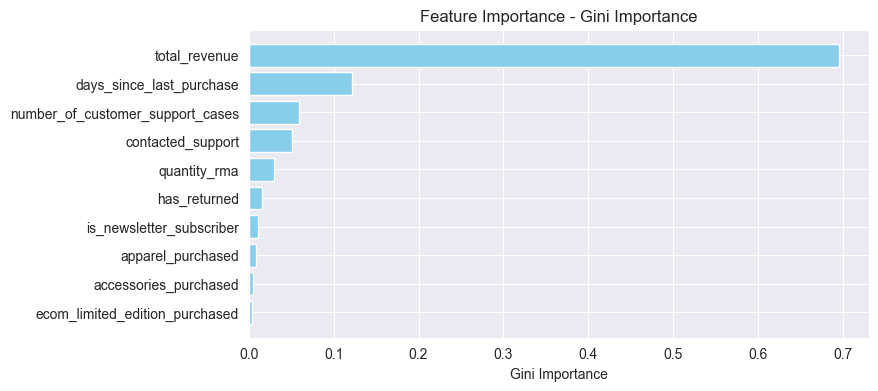

In [57]:
importances = rfmodel.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [58]:
kfold = KFold(n_splits=10,shuffle=True,random_state=0)
#running 10 fold cross validation and returning scores in list
accuracy_scores = []
precision_scores = []
recall_scores = []
for train_index, test_index in kfold.split(X):
  print("Train Index:", train_index, "\n")
  print("Test Index:", test_index)
  X_train,X_test,y_train,y_test = X[train_index],X[test_index],y[train_index],y[test_index]
  rfmodel.fit(X_train,y_train)
  y_pred = rfmodel.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=1)
  recall = recall_score(y_test, y_pred)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)

Train Index: [   0    1    2 ... 9945 9946 9947] 

Test Index: [   9   18   23   31   33   36   39   42   44   48  119  121  125  133
  140  150  154  159  167  176  181  190  196  201  221  224  226  230
  234  242  244  247  253  256  265  272  273  277  296  320  334  369
  377  382  390  406  410  424  449  454  462  476  487  491  495  499
  519  521  528  541  551  555  558  565  572  574  578  580  597  598
  651  655  660  665  671  683  692  693  704  713  722  776  779  799
  834  836  839  841  843  883  885  888  898  915  920  974  982  992
  994 1035 1069 1085 1095 1096 1102 1103 1106 1109 1121 1132 1145 1149
 1156 1167 1172 1176 1194 1201 1220 1231 1235 1237 1238 1240 1261 1270
 1283 1294 1308 1312 1358 1359 1363 1373 1376 1399 1418 1421 1422 1427
 1453 1454 1455 1461 1466 1478 1480 1534 1554 1559 1577 1585 1594 1644
 1645 1656 1662 1718 1730 1733 1746 1748 1751 1765 1783 1785 1788 1791
 1797 1819 1824 1826 1842 1845 1852 1861 1868 1872 1892 1917 1931 1941
 1942 1946 200

In [59]:
print("Average Accuracy: {:.2f}%".format(np.mean(accuracy_scores) * 100))
print("Average Precision: {:.2f}%".format(np.mean(precision_scores)*100))
print("Average Recall: {:.2f}%".format(np.mean(recall_scores)*100))
print("Accuracy Variance: {:.4f}".format(np.var(accuracy_scores)))

Average Accuracy: 91.99%
Average Precision: 90.63%
Average Recall: 93.47%
Accuracy Variance: 0.0000


### Test without total_revenue

In [60]:
features1 = ['number_of_customer_support_cases', 'is_newsletter_subscriber', 'apparel_purchased', 'accessories_purchased',
       'ecom_limited_edition_purchased', 'quantity_rma', 'days_since_last_purchase',
       'contacted_support','has_returned']

In [66]:
X = data[features1].values
y = data['repurchased'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfmodel = RandomForestClassifier(n_estimators=500)
rfmodel.fit(X_train,y_train)
y_pred = rfmodel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6879396984924623
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       998
           1       0.70      0.66      0.68       992

    accuracy                           0.69      1990
   macro avg       0.69      0.69      0.69      1990
weighted avg       0.69      0.69      0.69      1990



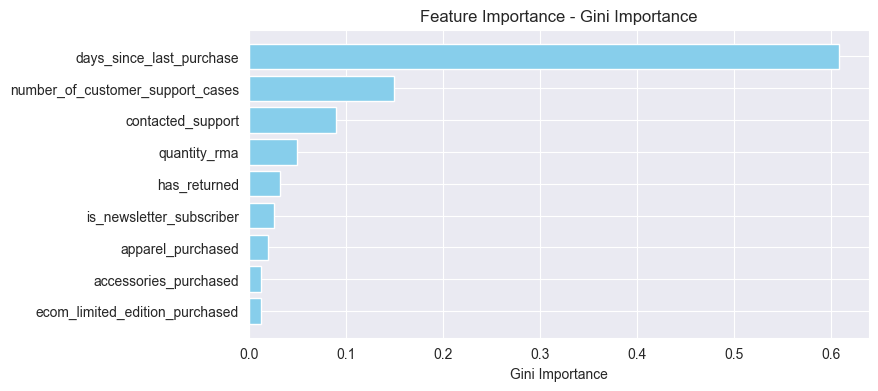

In [65]:
importances = rfmodel.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features1, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

Could also run gridsearch for Random Forest to try optimize hyperparameters

# Summary

### Exploratory Data Analysis

The dataset is made out of around 10000 unique customer IDs.

There are only 12 missing valus in the Country column, I decide not to drop them since I won't use this column as a feature when developing the ml model.

Around 70% of the customers are from the USA.

The 2 other bigger markets are Germany and the United Kingdom.

Almost 70% of the customers have not contacted support. Of those who have most have between 1 and 10 support cases. Morevover 50% of the customers that have contacted support have done it only once.

50% of the customers are subscribed to the newsletter.

Very small percentage of customers have bought apparel or accessories or limited edition items. Maybe could interesting to investigate who has bought all three or a combination of the three?

Total revenue has a wide range of values: from 1€ minimum to 327444€ maximum. There is big variability in spending. More than 50% of the revenue comes from the US customers.

There are probably some outliers? People spending more than 5000€? As seen in the histogram below, most customers have spent less 5000€.

Furthermore 70% of the customers have not made any returns. Most customers return few items, with a maximum of 44 returned items.

Also the days_since_last_purchase column has a wide range of values, it ranges from 0 to over 4,000 days, with a median of 324 days, indicating many customers have not purchased recently.

The repurchased column, which is also the target variable for the ml model, is pretty balanced.

Customer that are subscribed to newsletter tend to also make more repurchases. Moreover also customers that have made a return tend to be more likely to have made repurchases.

The more days pass from the last purchase the less likely a customer is to make a repurchase. 

### ML model

Using the correlation matrix I decide to use all of the features but the is_subscribed_to_cyclon and country.

Moreover also the categorical features I have created has_returned and contacted_support have a positive correlation with the repurchased target variable, so I decide to use them.



The goal is to predict whether a customer will repurchase so I decided to use Logistic Regression as baseline model, which is common for binary classification tasks like this one. Logistic regression provides interpretability and works well for linear decision boundaries.

The model model achieved an accuracy of 91% on the test data. Moreover the classification report showed that precision and recall for both classes were around 91%.

I also ran 10 fold cross validation to provide a more robust estimate of how well the model generalizes across different subsets of the data.

Also tried running grid search to try optimizing the hyperparamters but still getting similar results.

To return a probability score I could just use the predict_proba method.

Lastly also made an experiment using Random Forest with this task, it yields similar result. 

I tried using Random forest since it's easy to exctract feature importance and found out that total revenue spent by a customer On is by far the most impactful feature.